In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# 모든 CSV 파일이 저장된 폴더 경로 (예시로 '/mnt/data/' 사용)
folder_path = '/'

# 해당 폴더의 모든 CSV 파일 경로를 가져옵니다.
file_paths = glob.glob(folder_path + '*.csv')

# 모든 데이터 파일을 저장할 리스트
data_list = []

# 각 파일을 읽어와서 리스트에 저장
for file in file_paths:
    data = pd.read_csv(file)
    data.columns = ['Time', 'Voltage']  # 각 파일의 열 이름을 동일하게 설정
    data_list.append(data)

# 모든 파일의 전압 데이터를 평균화하여 새로운 데이터프레임 생성
averaged_data = data_list[0].copy()
for data in data_list[1:]:
    averaged_data['Voltage'] += data['Voltage']
averaged_data['Voltage'] /= len(data_list)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(averaged_data['Time'], averaged_data['Voltage'], label='Averaged Voltage')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Signal Averaging of Voltage Data')
plt.legend()
plt.grid(True)
plt.show()


IndexError: list index out of range

Found files: ['.\\C1Trace00001.csv', '.\\C1Trace00002.csv', '.\\C1Trace00003.csv', '.\\C1Trace00004.csv', '.\\C1Trace00005.csv', '.\\C1Trace00006.csv', '.\\C1Trace00007.csv', '.\\C1Trace00008.csv', '.\\C1Trace00009.csv', '.\\C1Trace00010.csv']


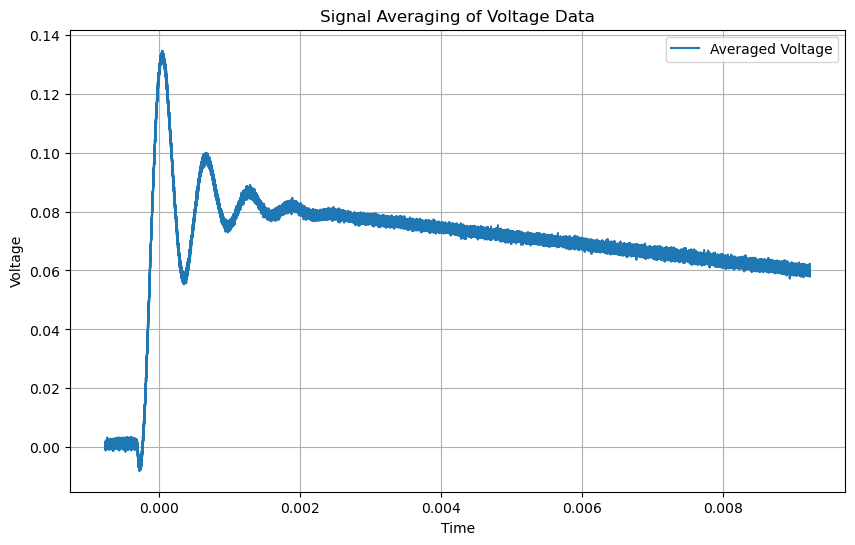

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# 모든 CSV 파일이 저장된 폴더 경로 (예시로 '/mnt/data/' 사용)
folder_path = './'  # CSV 파일이 저장된 정확한 경로로 수정하세요.

# 해당 폴더의 모든 CSV 파일 경로를 가져옵니다.
file_paths = glob.glob(folder_path + '*.csv')

# 파일 경로를 출력하여 확인
print("Found files:", file_paths)

# 모든 데이터 파일을 저장할 리스트
data_list = []

# 각 파일을 읽어와서 리스트에 저장
for file in file_paths:
    # 파일을 읽어올 때 처음 5행을 건너뜁니다.
    data = pd.read_csv(file, skiprows=5)
    data.columns = ['Time', 'Voltage']  # 각 파일의 열 이름을 동일하게 설정
    data_list.append(data)

# 파일이 없는 경우에 대한 처리
if not data_list:
    print("No CSV files found in the specified folder.")
else:
    # 모든 파일의 전압 데이터를 평균화하여 새로운 데이터프레임 생성
    averaged_data = data_list[0].copy()
    for data in data_list[1:]:
        averaged_data['Voltage'] += data['Voltage']
    averaged_data['Voltage'] /= len(data_list)

    # 결과 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(averaged_data['Time'], averaged_data['Voltage'], label='Averaged Voltage')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.title('Signal Averaging of Voltage Data')
    plt.legend()
    plt.grid(True)
    plt.show()


C:\Users\parkjipyeong\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


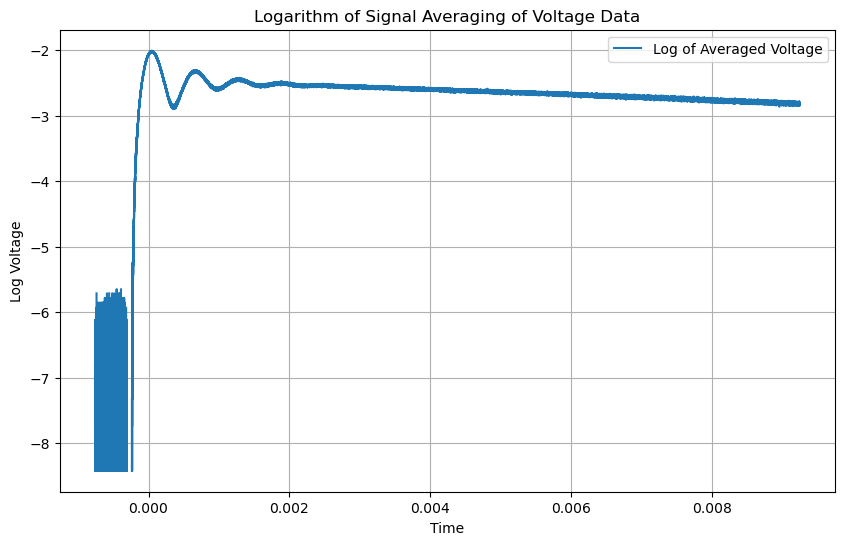

In [27]:
import numpy as np

# 전압 데이터의 로그 변환
averaged_data['Log Voltage'] = np.log(averaged_data['Voltage'].replace(0, np.nan))  # 로그 변환 시 0을 NaN으로 대체하여 무한대 방지

# 로그 변환된 데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(averaged_data['Time'], averaged_data['Log Voltage'], label='Log of Averaged Voltage')
plt.xlabel('Time')
plt.ylabel('Log Voltage')
plt.title('Logarithm of Signal Averaging of Voltage Data')
plt.legend()
plt.grid(True)
plt.show()


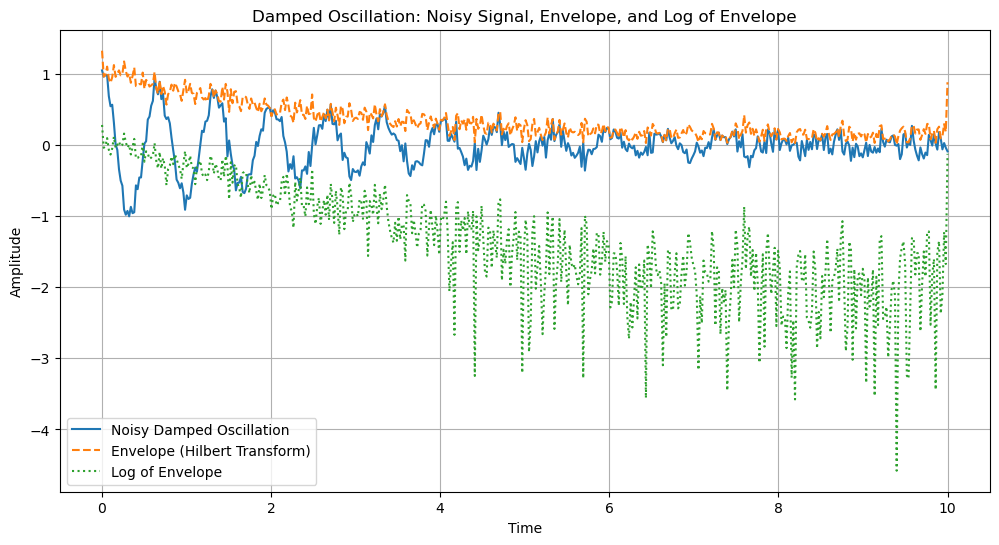

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert

# 감쇠 진동 샘플 데이터 생성
np.random.seed(42)
time = np.linspace(0, 10, 500)
damped_oscillation = np.exp(-0.3 * time) * np.cos(2 * np.pi * 1.5 * time)  # 감쇠 진동 데이터
noise = np.random.normal(0, 0.1, len(time))  # 노이즈 생성
noisy_signal = damped_oscillation + noise  # 감쇠 진동 데이터에 노이즈 추가

# 엔벨로프 추출 (힐버트 변환)
analytic_signal = hilbert(noisy_signal)
envelope = np.abs(analytic_signal)

# 로그 변환
log_envelope = np.log(envelope + 1e-10)  # 0 또는 음수 방지용 작은 상수 추가

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(time, noisy_signal, label='Noisy Damped Oscillation')
plt.plot(time, envelope, label='Envelope (Hilbert Transform)', linestyle='--')
plt.plot(time, log_envelope, label='Log of Envelope', linestyle=':')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Damped Oscillation: Noisy Signal, Envelope, and Log of Envelope')
plt.legend()
plt.grid(True)
plt.show()


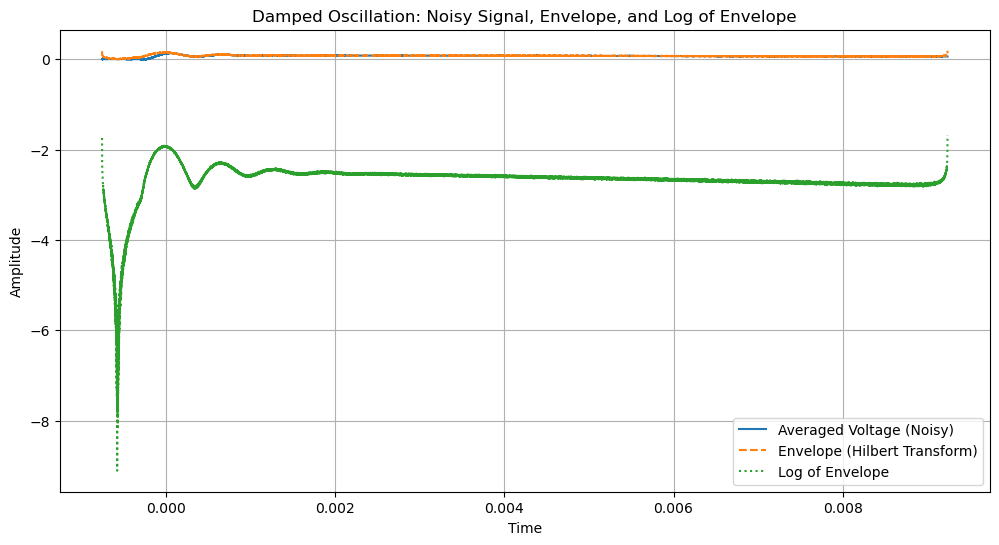

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert

# 모든 CSV 파일이 저장된 폴더 경로
folder_path = './'  # 사용자의 실제 데이터가 있는 폴더 경로로 수정하세요.

# 해당 폴더의 모든 CSV 파일 경로를 가져옵니다.
file_paths = glob.glob(folder_path + '*.csv')

# 모든 데이터 파일을 저장할 리스트
data_list = []

# 각 파일을 읽어와서 리스트에 저장
for file in file_paths:
    data = pd.read_csv(file, skiprows=5)  # 필요한 경우 skiprows를 수정하여 데이터 시작 지점을 맞추세요
    data.columns = ['Time', 'Voltage']  # 각 파일의 열 이름을 동일하게 설정
    data_list.append(data)

# 파일이 없는 경우에 대한 처리
if not data_list:
    print("No CSV files found in the specified folder.")
else:
    # 모든 파일의 전압 데이터를 평균화하여 새로운 데이터프레임 생성
    averaged_data = data_list[0].copy()
    for data in data_list[1:]:
        averaged_data['Voltage'] += data['Voltage']
    averaged_data['Voltage'] /= len(data_list)

    # 감쇠 진동 데이터의 엔벨로프 추출 (힐버트 변환)
    analytic_signal = hilbert(averaged_data['Voltage'])
    envelope = np.abs(analytic_signal)

    # 로그 변환 (0 또는 음수 방지를 위해 작은 상수 추가)
    log_envelope = np.log(envelope + 1e-10)

    # 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(averaged_data['Time'], averaged_data['Voltage'], label='Averaged Voltage (Noisy)')
    plt.plot(averaged_data['Time'], envelope, label='Envelope (Hilbert Transform)', linestyle='--')
    plt.plot(averaged_data['Time'], log_envelope, label='Log of Envelope', linestyle=':')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Damped Oscillation: Noisy Signal, Envelope, and Log of Envelope')
    plt.legend()
    plt.grid(True)
    plt.show()


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt
import glob

# 모든 CSV 파일이 저장된 폴더 경로 (사용자의 실제 경로로 수정)
folder_path = './'  # 실제 데이터가 있는 폴더 경로로 수정하세요.

# 해당 폴더의 모든 CSV 파일 경로를 가져옵니다.
file_paths = glob.glob(folder_path + '*.csv')

# 모든 데이터 파일을 저장할 리스트
data_list = []

# 각 파일을 읽어와서 리스트에 저장
for file in file_paths:
    data = pd.read_csv(file, skiprows=5)  # 필요한 경우 skiprows를 수정하여 데이터 시작 지점을 맞추세요
    data.columns = ['Time', 'Voltage']  # 각 파일의 열 이름을 동일하게 설정
    data_list.append(data)

# 파일이 없는 경우에 대한 처리
if not data_list:
    print("No CSV files found in the specified folder.")
else:
    # 모든 파일의 전압 데이터를 평균화하여 새로운 데이터프레임 생성
    averaged_data = data_list[0].copy()
    for data in data_list[1:]:
        averaged_data['Voltage'] += data['Voltage']
    averaged_data['Voltage'] /= len(data_list)

    # 저역통과 필터 적용
    # 필터 설정 (예: 5Hz 이하의 주파수를 통과시키는 저역통과 필터)
    fs = 1 / np.mean(np.diff(averaged_data['Time']))  # 샘플링 주파수 계산
    cutoff = 5.0  # 저역통과 필터의 컷오프 주파수 (Hz)
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / ny


NameError: name 'ny' is not defined

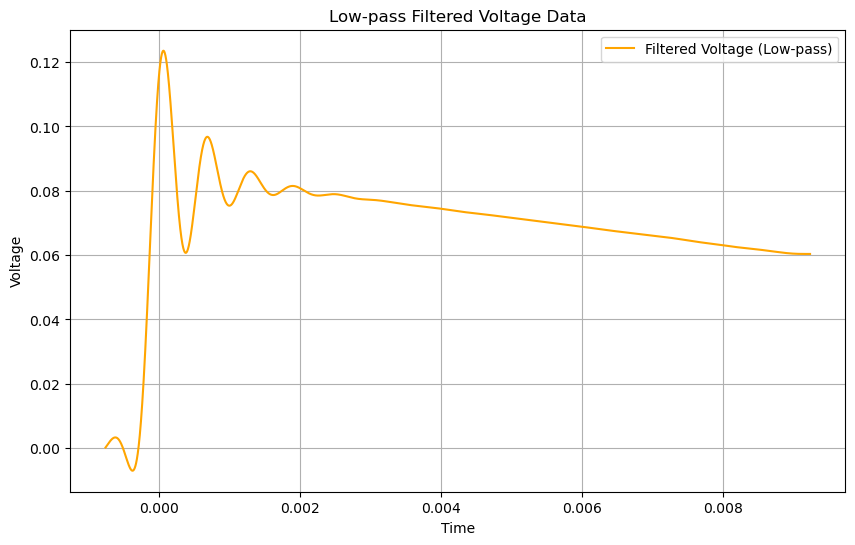

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt
import glob

# 모든 CSV 파일이 저장된 폴더 경로 (사용자의 실제 경로로 수정)
folder_path = './'  # 실제 데이터가 있는 폴더 경로로 수정하세요.

# 해당 폴더의 모든 CSV 파일 경로를 가져옵니다.
file_paths = glob.glob(folder_path + '*.csv')

# 모든 데이터 파일을 저장할 리스트
data_list = []

# 각 파일을 읽어와서 리스트에 저장
for file in file_paths:
    data = pd.read_csv(file, skiprows=5)  # 필요한 경우 skiprows를 수정하여 데이터 시작 지점을 맞추세요
    data.columns = ['Time', 'Voltage']  # 각 파일의 열 이름을 동일하게 설정
    data_list.append(data)

# 파일이 없는 경우에 대한 처리
if not data_list:
    print("No CSV files found in the specified folder.")
else:
    # 모든 파일의 전압 데이터를 평균화하여 새로운 데이터프레임 생성
    averaged_data = data_list[0].copy()
    for data in data_list[1:]:
        averaged_data['Voltage'] += data['Voltage']
    averaged_data['Voltage'] /= len(data_list)

    # 저역통과 필터 적용
    # 필터 설정 (예: 5Hz 이하의 주파수를 통과시키는 저역통과 필터)
    fs = 1 / np.mean(np.diff(averaged_data['Time']))  # 샘플링 주파수 계산
    cutoff = 2*1000  # 저역통과 필터의 컷오프 주파수 (Hz)
    nyquist = 0.5 * fs  # 나이퀴스트 주파수 계산
    normal_cutoff = cutoff / nyquist  # 정규화된 컷오프 주파수

    # Butterworth 필터 생성
    b, a = butter(N=4, Wn=normal_cutoff, btype='low', analog=False)
    filtered_voltage = filtfilt(b, a, averaged_data['Voltage'])

    # 필터링된 데이터 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(averaged_data['Time'], filtered_voltage, label='Filtered Voltage (Low-pass)', color='orange')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.title('Low-pass Filtered Voltage Data')
    plt.legend()
    plt.grid(True)
    plt.show()


Logarithmic Decay Rate (Slope): 115.9575


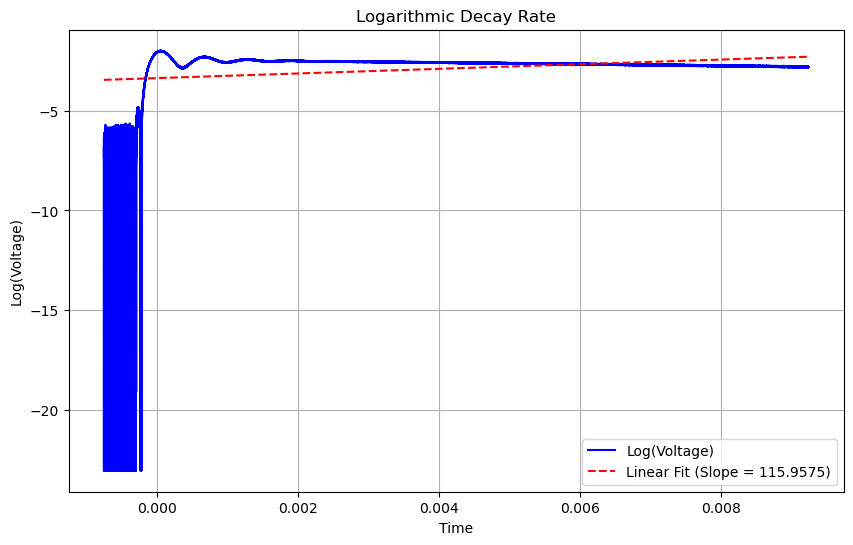

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# 모든 CSV 파일이 저장된 폴더 경로 (사용자의 실제 경로로 수정)
folder_path = './'  # 실제 데이터가 있는 폴더 경로로 수정하세요.

# 해당 폴더의 모든 CSV 파일 경로를 가져옵니다.
file_paths = glob.glob(folder_path + '*.csv')

# 모든 데이터 파일을 저장할 리스트
data_list = []

# 각 파일을 읽어와서 리스트에 저장
for file in file_paths:
    data = pd.read_csv(file, skiprows=5)  # 필요한 경우 skiprows를 수정하여 데이터 시작 지점을 맞추세요
    data.columns = ['Time', 'Voltage']  # 각 파일의 열 이름을 동일하게 설정
    data_list.append(data)

# 파일이 없는 경우에 대한 처리
if not data_list:
    print("No CSV files found in the specified folder.")
else:
    # 모든 파일의 전압 데이터를 평균화하여 새로운 데이터프레임 생성
    averaged_data = data_list[0].copy()
    for data in data_list[1:]:
        averaged_data['Voltage'] += data['Voltage']
    averaged_data['Voltage'] /= len(data_list)

    # 전압 데이터의 절댓값을 사용하여 로그 변환 (음수 방지)
    log_voltage = np.log(np.abs(averaged_data['Voltage']) + 1e-10)

    # 시간과 로그 전압 데이터로부터 대수 감소율 계산
    # 선형 회귀를 통해 로그 감소율 추정
    slope, intercept = np.polyfit(averaged_data['Time'], log_voltage, 1)

    # 감소율 출력
    print(f"Logarithmic Decay Rate (Slope): {slope:.4f}")

    # 결과 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(averaged_data['Time'], log_voltage, label='Log(Voltage)', color='blue')
    plt.plot(averaged_data['Time'], slope * averaged_data['Time'] + intercept, 
             label=f'Linear Fit (Slope = {slope:.4f})', linestyle='--', color='red')
    plt.xlabel('Time')
    plt.ylabel('Log(Voltage)')
    plt.title('Logarithmic Decay Rate')
    plt.legend()
    plt.grid(True)
    plt.show()


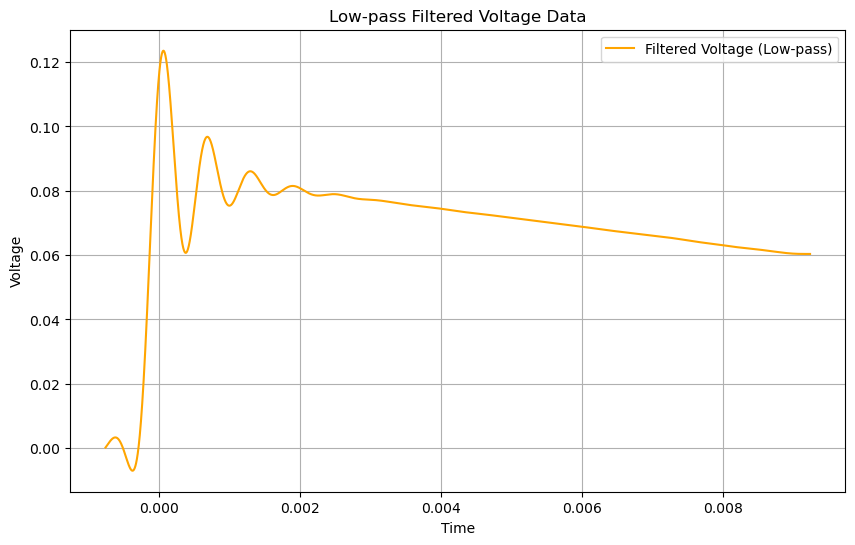

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt
import glob

# 모든 CSV 파일이 저장된 폴더 경로 (사용자의 실제 경로로 수정)
folder_path = './'  # 실제 데이터가 있는 폴더 경로로 수정하세요.

# 해당 폴더의 모든 CSV 파일 경로를 가져옵니다.
file_paths = glob.glob(folder_path + '*.csv')

# 모든 데이터 파일을 저장할 리스트
data_list = []

# 각 파일을 읽어와서 리스트에 저장
for file in file_paths:
    data = pd.read_csv(file, skiprows=5)  # 필요한 경우 skiprows를 수정하여 데이터 시작 지점을 맞추세요
    data.columns = ['Time', 'Voltage']  # 각 파일의 열 이름을 동일하게 설정
    data_list.append(data)

# 파일이 없는 경우에 대한 처리
if not data_list:
    print("No CSV files found in the specified folder.")
else:
    # 모든 파일의 전압 데이터를 평균화하여 새로운 데이터프레임 생성
    averaged_data = data_list[0].copy()
    for data in data_list[1:]:
        averaged_data['Voltage'] += data['Voltage']
    averaged_data['Voltage'] /= len(data_list)

    # 저역통과 필터 적용
    # 필터 설정 (예: 5Hz 이하의 주파수를 통과시키는 저역통과 필터)
    fs = 1 / np.mean(np.diff(averaged_data['Time']))  # 샘플링 주파수 계산
    cutoff = 2*1000  # 저역통과 필터의 컷오프 주파수 (Hz)
    nyquist = 0.5 * fs  # 나이퀴스트 주파수 계산
    normal_cutoff = cutoff / nyquist  # 정규화된 컷오프 주파수

    # Butterworth 필터 생성
    b, a = butter(N=4, Wn=normal_cutoff, btype='low', analog=False)
    filtered_voltage = filtfilt(b, a, averaged_data['Voltage'])

    # 필터링된 데이터 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(averaged_data['Time'], filtered_voltage, label='Filtered Voltage (Low-pass)', color='orange')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.title('Low-pass Filtered Voltage Data')
    plt.legend()
    plt.grid(True)
    plt.show()


In [5]:
 # 힐버트 변환을 사용하여 엔벨롭 추출
    analytic_signal = hilbert(filtered_voltage)
    envelope = np.abs(analytic_signal)

    # 엔벨롭 데이터 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(averaged_data['Time'], averaged_data['Voltage'], label='Original Voltage (Noisy)', color='blue')
    plt.plot(averaged_data['Time'], envelope, label='Envelope (Hilbert Transform)', color='red', linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.title('Envelope of Voltage Data')
    plt.legend()
    plt.grid(True)
    plt.show()

IndentationError: unexpected indent (3941769188.py, line 2)

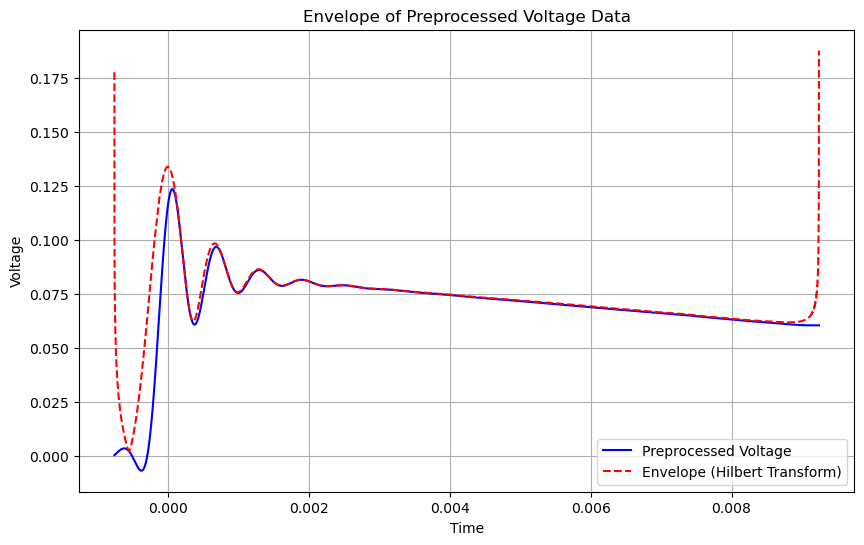

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# 전처리된 데이터 예시 (사용자가 이미 가지고 있는 데이터)
# 예를 들어, 사용자 데이터가 다음과 같은 형태일 수 있음
time = averaged_data['Time']  # 시간 데이터 예시
voltage = filtered_voltage  # 감쇠 진동 예시 데이터

# 전처리된 데이터를 기반으로 엔벨롭 추출
analytic_signal = hilbert(voltage)
envelope = np.abs(analytic_signal)

# 엔벨롭 데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(time, voltage, label='Preprocessed Voltage', color='blue')
plt.plot(time, envelope, label='Envelope (Hilbert Transform)', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Envelope of Preprocessed Voltage Data')
plt.legend()
plt.grid(True)
plt.show()



In [13]:
# 자연로그 대수 감쇠비 계산
# 감쇠비는 로그 변환된 전압 데이터의 선형 회귀 기울기로 계산할 수 있음

# 전압 데이터의 절댓값을 사용하여 로그 변환 (음수 방지)
log_voltage = np.log(np.abs(filtered_voltage) + 1e-10)

# 시간과 로그 전압 데이터로부터 대수 감쇠율 계산
# 선형 회귀를 통해 로그 감쇠율 추정
slope, intercept = np.polyfit(time, log_voltage, 1)

# 감쇠비 출력
print(f"Logarithmic Decay Rate (Natural Log Slope): {slope:.4f}")


Logarithmic Decay Rate (Natural Log Slope): 71.0380


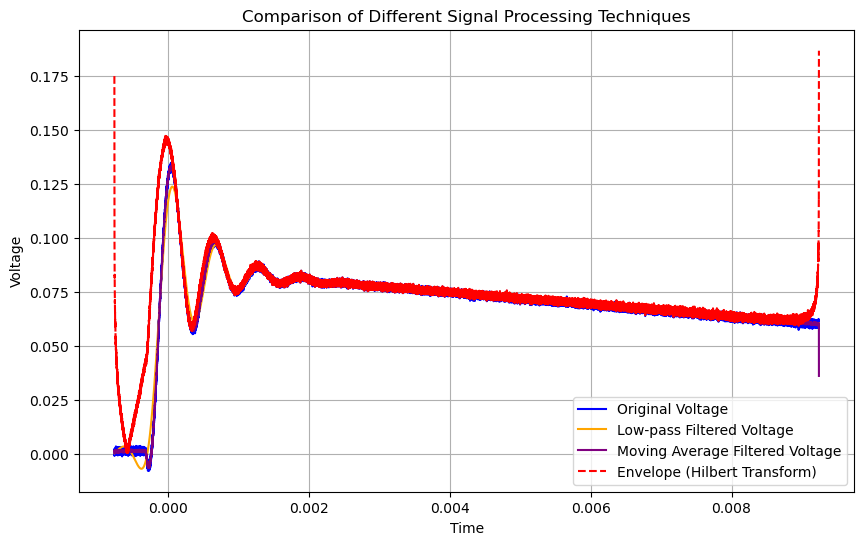

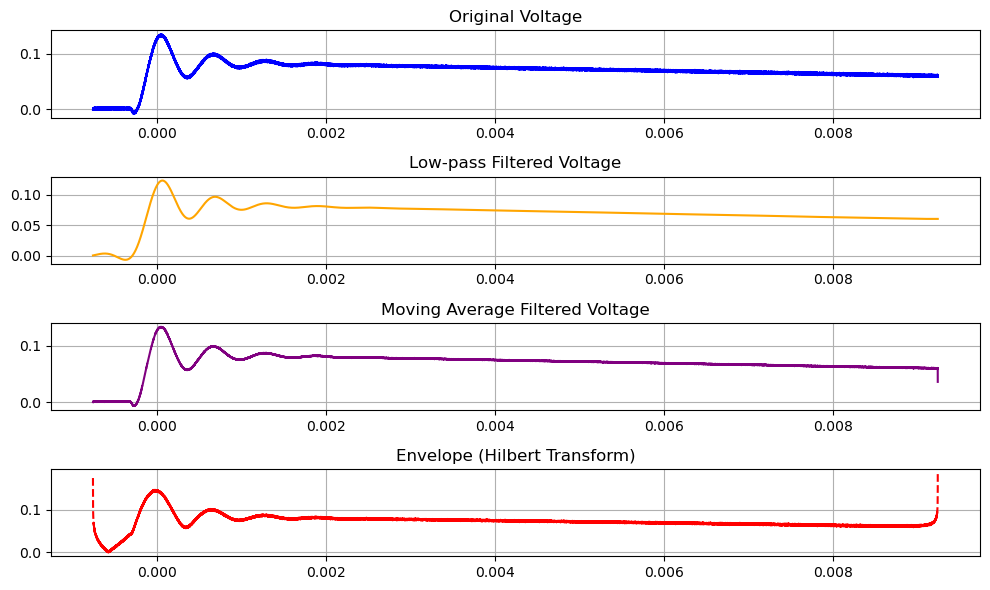

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, hilbert
import glob

# 모든 CSV 파일이 저장된 폴더 경로 (사용자의 실제 경로로 수정)
folder_path = './'  # 실제 데이터가 있는 폴더 경로로 수정하세요.

# 해당 폴더의 모든 CSV 파일 경로를 가져옵니다.
file_paths = glob.glob(folder_path + '*.csv')

# 모든 데이터 파일을 저장할 리스트
data_list = []

# 각 파일을 읽어와서 리스트에 저장
for file in file_paths:
    data = pd.read_csv(file, skiprows=5)  # 필요한 경우 skiprows를 수정하여 데이터 시작 지점을 맞추세요
    data.columns = ['Time', 'Voltage']  # 각 파일의 열 이름을 동일하게 설정
    data_list.append(data)

# 파일이 없는 경우에 대한 처리
if not data_list:
    print("No CSV files found in the specified folder.")
else:
    # 모든 파일의 전압 데이터를 평균화하여 새로운 데이터프레임 생성
    averaged_data = data_list[0].copy()
    for data in data_list[1:]:
        averaged_data['Voltage'] += data['Voltage']
    averaged_data['Voltage'] /= len(data_list)

    # 전처리된 데이터 준비
    time = averaged_data['Time']
    original_voltage = averaged_data['Voltage']

    # 저역통과 필터 적용
    fs = 1 / np.mean(np.diff(time))  # 샘플링 주파수 계산
    cutoff = 2.0*1000  # 컷오프 주파수 (Hz)
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(N=4, Wn=normal_cutoff, btype='low', analog=False)
    filtered_voltage = filtfilt(b, a, original_voltage)

    # 이동 평균 필터 적용
    window_size = 10  # 윈도우 크기
    moving_avg_voltage = np.convolve(original_voltage, np.ones(window_size)/window_size, mode='same')

    # 힐버트 변환을 사용한 엔벨롭 추출
    analytic_signal = hilbert(original_voltage)
    envelope = np.abs(analytic_signal)

    # 4개 그림 오버랩
    plt.figure(figsize=(10, 6))
    plt.plot(time, original_voltage, label='Original Voltage', color='blue')
    plt.plot(time, filtered_voltage, label='Low-pass Filtered Voltage', color='orange')
    plt.plot(time, moving_avg_voltage, label='Moving Average Filtered Voltage', color='purple')
    plt.plot(time, envelope, label='Envelope (Hilbert Transform)', color='red', linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.title('Comparison of Different Signal Processing Techniques')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 개별 플롯 4개
    plt.figure(figsize=(10, 6))
    plt.subplot(4, 1, 1)
    plt.plot(time, original_voltage, color='blue')
    plt.title('Original Voltage')
    plt.grid(True)

    plt.subplot(4, 1, 2)
    plt.plot(time, filtered_voltage, color='orange')
    plt.title('Low-pass Filtered Voltage')
    plt.grid(True)

    plt.subplot(4, 1, 3)
    plt.plot(time, moving_avg_voltage, color='purple')
    plt.title('Moving Average Filtered Voltage')
    plt.grid(True)

    plt.subplot(4, 1, 4)
    plt.plot(time, envelope, color='red', linestyle='--')
    plt.title('Envelope (Hilbert Transform)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

